The aim of the project is to develop a predictive machine learning model that identifies the relationship between production units and sales revenue. This model will enable businesses to forecast sales based on production levels, optimize resource allocation, and maximize revenue generation.


## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and prepare Data

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
# Check the shape of my data
df.shape

(700, 2)

In [4]:
# Check for missing data
df.isna().sum()

x    0
y    1
dtype: int64

In [5]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
# Check data description
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [7]:
df.select_dtypes(include="float").columns

Index(['x', 'y'], dtype='object')

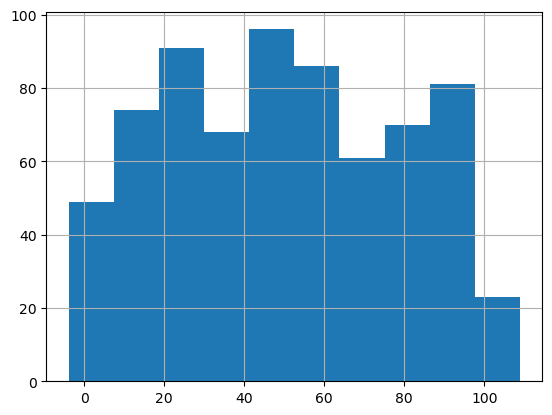

In [8]:
df["y"].hist()
plt.show()

In [9]:
# Check foe skewness
df["y"].skew()
# since it is less than 1 we use the mean to fill the missing values

0.05403403004596619

In [10]:
# Fill in missing values
df["y"] = df["y"].fillna(df["y"].mean())

In [11]:
# Check for missing values
df.isna().sum()

x    0
y    0
dtype: int64

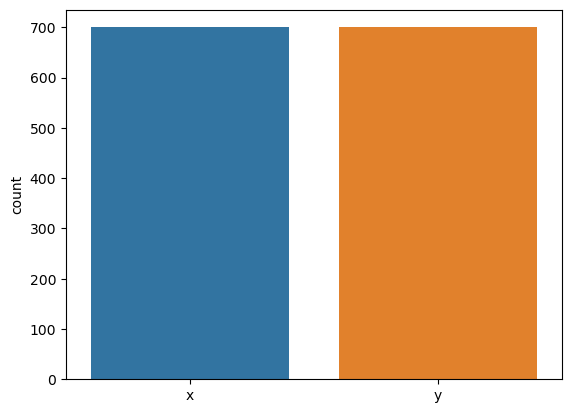

In [12]:
sns.countplot(df);

In [13]:
# Box Plot
# import seaborn as sns
# sns.boxplot(df["x"])

In [14]:
# removing outliers
# def removal_box_plot(df, column, threshold):
#     sns.boxplot(df[column])
#     plt.title(f'Original Box Plot of {column}')
#     plt.show()

#     removed_outliers = df[df[column] <= threshold]

#     sns.boxplot(removed_outliers[column])
#     plt.title(f'Box Plot without Outliers of {column}')
#     plt.show()
#     return removed_outliers


# threshold_value = 100

# no_outliers = removal_box_plot(df, 'x', threshold_value)

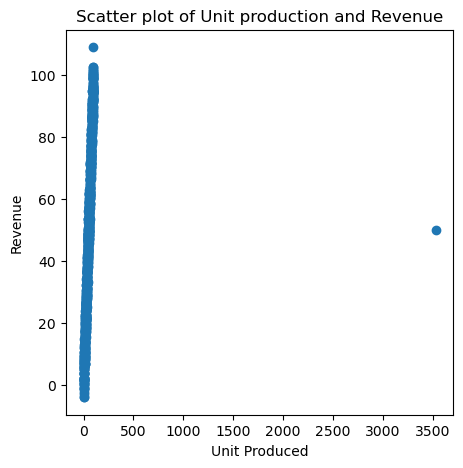

In [15]:
# Check for outliers

plt.figure(figsize=(5, 5))
plt.scatter(df["x"], df["y"])
plt.title("Scatter plot of Unit production and Revenue")
plt.xlabel("Unit Produced")
plt.ylabel("Revenue")
plt.show()

In [16]:
# Remove outliers
upper_limit = df["x"].quantile(0.95)
lower_limit = df["x"].quantile(0.05)
df["x"] = df["x"].clip(lower_limit, upper_limit)

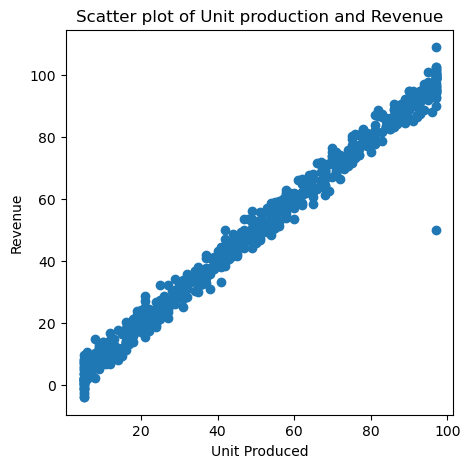

In [17]:
plt.figure(figsize=(5, 5))
plt.scatter(df["x"], df["y"])
plt.title("Scatter plot of Unit production and Revenue")
plt.xlabel("Unit Produced")
plt.ylabel("Revenue")
plt.show()

In [18]:
df.describe()

,x,y
count,700.000000,700.000000
mean,50.125714,49.939869
std,28.651698,29.088388
min,5.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,49.095828
75%,75.000000,74.880631
max,97.000000,108.871618


In [19]:
# from scipy import stats
# import numpy as np
# z = np.abs(stats.zscore(df['x']))
# print(z)

In [20]:
# threshold_z = 5

# outlier_indices = np.where(z > threshold_z)[0]
# x = df.drop(outlier_indices)
# print("Original DataFrame Shape:", df.shape)
# print("DataFrame Shape after Removing Outliers:", x.shape)

In [21]:
# View my dataset
df = pd.get_dummies(data = df)
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [22]:
df.corr()

,x,y
x,1.000000,0.993111
y,0.993111,1.000000


In [23]:
# from sklearn.preprocessing import StandardScaler

In [24]:
# scaler = StandardScaler()
# features = df
# scaled_features = scaler.fit_transform(features.values)

In [25]:
# scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

# Convert continuous labels to discrete classes
# y = [int(label) for label in y]

In [26]:
# scaled_df.head(5)

In [27]:
# scaled_df.dtypes

## Split data into train and test set

In [28]:
X = df.drop(columns="y").values.reshape(-1,1)
y = df["y"]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(560, 140, 560, 140)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((560, 1), (140, 1), (560,), (140,))

## Model building using linear_model

In [32]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_squared_error, r2_score

reg = linear_model.Ridge(alpha=.5)

In [33]:
reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [34]:
reg.coef_

array([1.00676004])

In [35]:
reg.intercept_

-0.5521471144201371

In [36]:
reg.score(X_test, y_test)

0.9907327050712748

## Evaluate model

In [37]:
y_preds = reg.predict(X_test)

In [38]:
mae = mean_absolute_error(y_test,y_preds)
r2 = r2_score(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)

In [39]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"r2: {r2:.2f}")

MAE: 2.36
MSE: 8.75
r2: 0.99


## Model building using LinearRegression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
linreg = LinearRegression()

In [42]:
linreg.fit(X_train, y_train)

LinearRegression()

In [43]:
linreg.score(X_test, y_test)

0.9907327193956881

In [44]:
y_pred = linreg.predict(X_test)

In [45]:
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [46]:
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"r2: {r2:.2f}")

MAE: 2.36
MSE: 8.75
r2: 0.99


In [47]:
df["z"] = linreg.predict(df[["x"]])

C:\Users\Fawaz Aro\Documents\ML-course\heart-disease-project\env\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [48]:
df.rename(columns={"x": "ProductionUnit",
                        "y": "ActualRevenue",
                        "z": "PredictedRevenue"},
                        inplace = True,)

In [49]:
df.head()

,ProductionUnit,ActualRevenue,PredictedRevenue
0,24.0,21.549452,23.610063
1,50.0,47.464463,49.785854
2,15.0,17.218656,14.549213
3,38.0,36.586398,37.704720
4,87.0,87.288984,87.036018
